In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


plt.style.use('dark_background')

In [2]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
df.isna().sum()

# here there are no null values in the data.

YearsExperience    0
Salary             0
dtype: int64

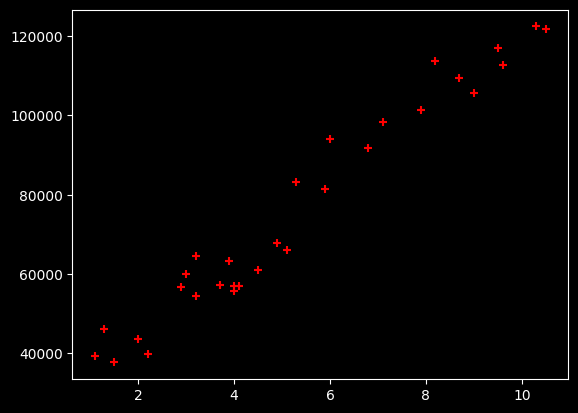

In [9]:
plt.scatter(df.YearsExperience, df.Salary, marker = '+', color = 'red')

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

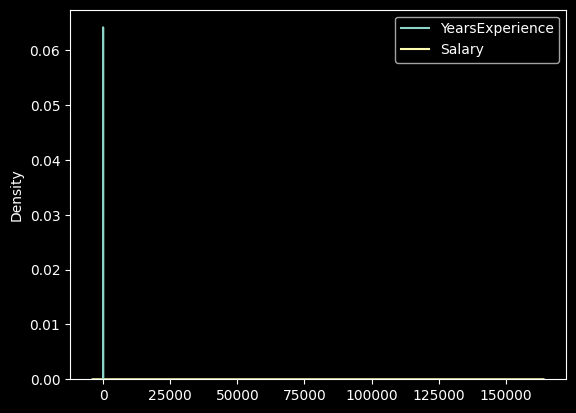

In [10]:
sns.kdeplot(df)

In [11]:
def norm(x):
    z = (x-x.min())/(x.max()-x.min())
    return z

In [12]:
norm_data = norm(df)
norm_data.head()

,YearsExperience,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514


C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

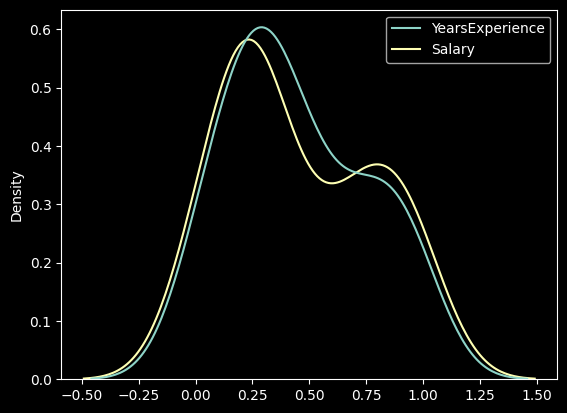

In [13]:
sns.kdeplot(norm_data)

In [16]:
input = norm_data.drop('Salary', axis = 'columns')
input.head()

,YearsExperience
0,0.000000
1,0.021277
2,0.042553
3,0.095745
4,0.117021


In [17]:
target = norm_data.drop('YearsExperience', axis = 'columns')
target.head()

,Salary
0,0.019041
1,0.100094
2,0.000000
3,0.068438
4,0.025514


In [19]:
model = LinearRegression()

In [20]:
model.fit(input, target)

LinearRegression()

In [21]:
model.score(input, target)

0.9569566641435086

In [24]:
pred = model.predict(input)

In [26]:
mse = mean_squared_error(target, pred)
mse

0.004362993548418737

In [27]:
rmse = np.sqrt(mse)
rmse

0.06605296017907704

<Axes: xlabel='Salary', ylabel='YearsExperience'>

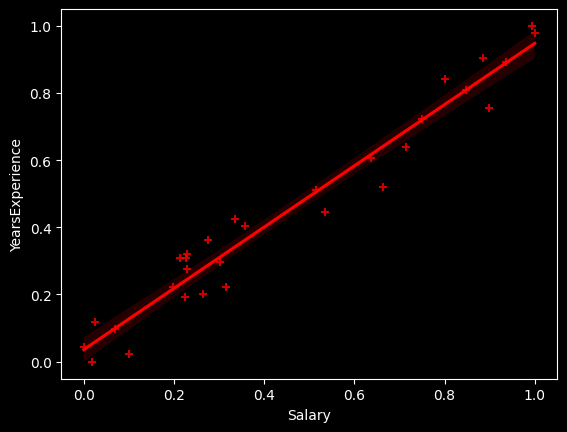

In [28]:
sns.regplot(x = 'Salary', y ='YearsExperience', data = norm_data, marker = '+', color = 'red')